In [1]:
import pandas as pd
data = pd.read_csv('../environnement_data/population.csv', index_col=[0])
set(data.region_code)

df_region = pd.read_csv('../environnement_data/region_code_region_name.csv')
df = pd.merge(data, df_region, on = 'region_code')
df.to_csv('../environnement_data/population_region_name.csv')


In [2]:

keep = [
 're_arabic_world',
 're_balkans',
 're_british_islands',
 're_central_europe',
 're_chinese_world',
 're_eastern_europe',
 're_france',
 're_german_world',
 're_greek_world',
 're_indian_world',
 're_italy',
 're_japan',
 're_korea',
 're_latin',
 're_low_countries',
 're_muslim_world',
 're_nordic_countries',
 're_ottoman_turkey',
 're_persian_world',
 're_portugal',
 're_southwestern_europe',
 're_spain',
 're_united_kingdom',
 're_western_europe']



df = df[df['region_code'].isin(keep)]
df = df[df['year']<=1800]
df = df[df['year']>=-800]

<Figure size 1000x800 with 0 Axes>

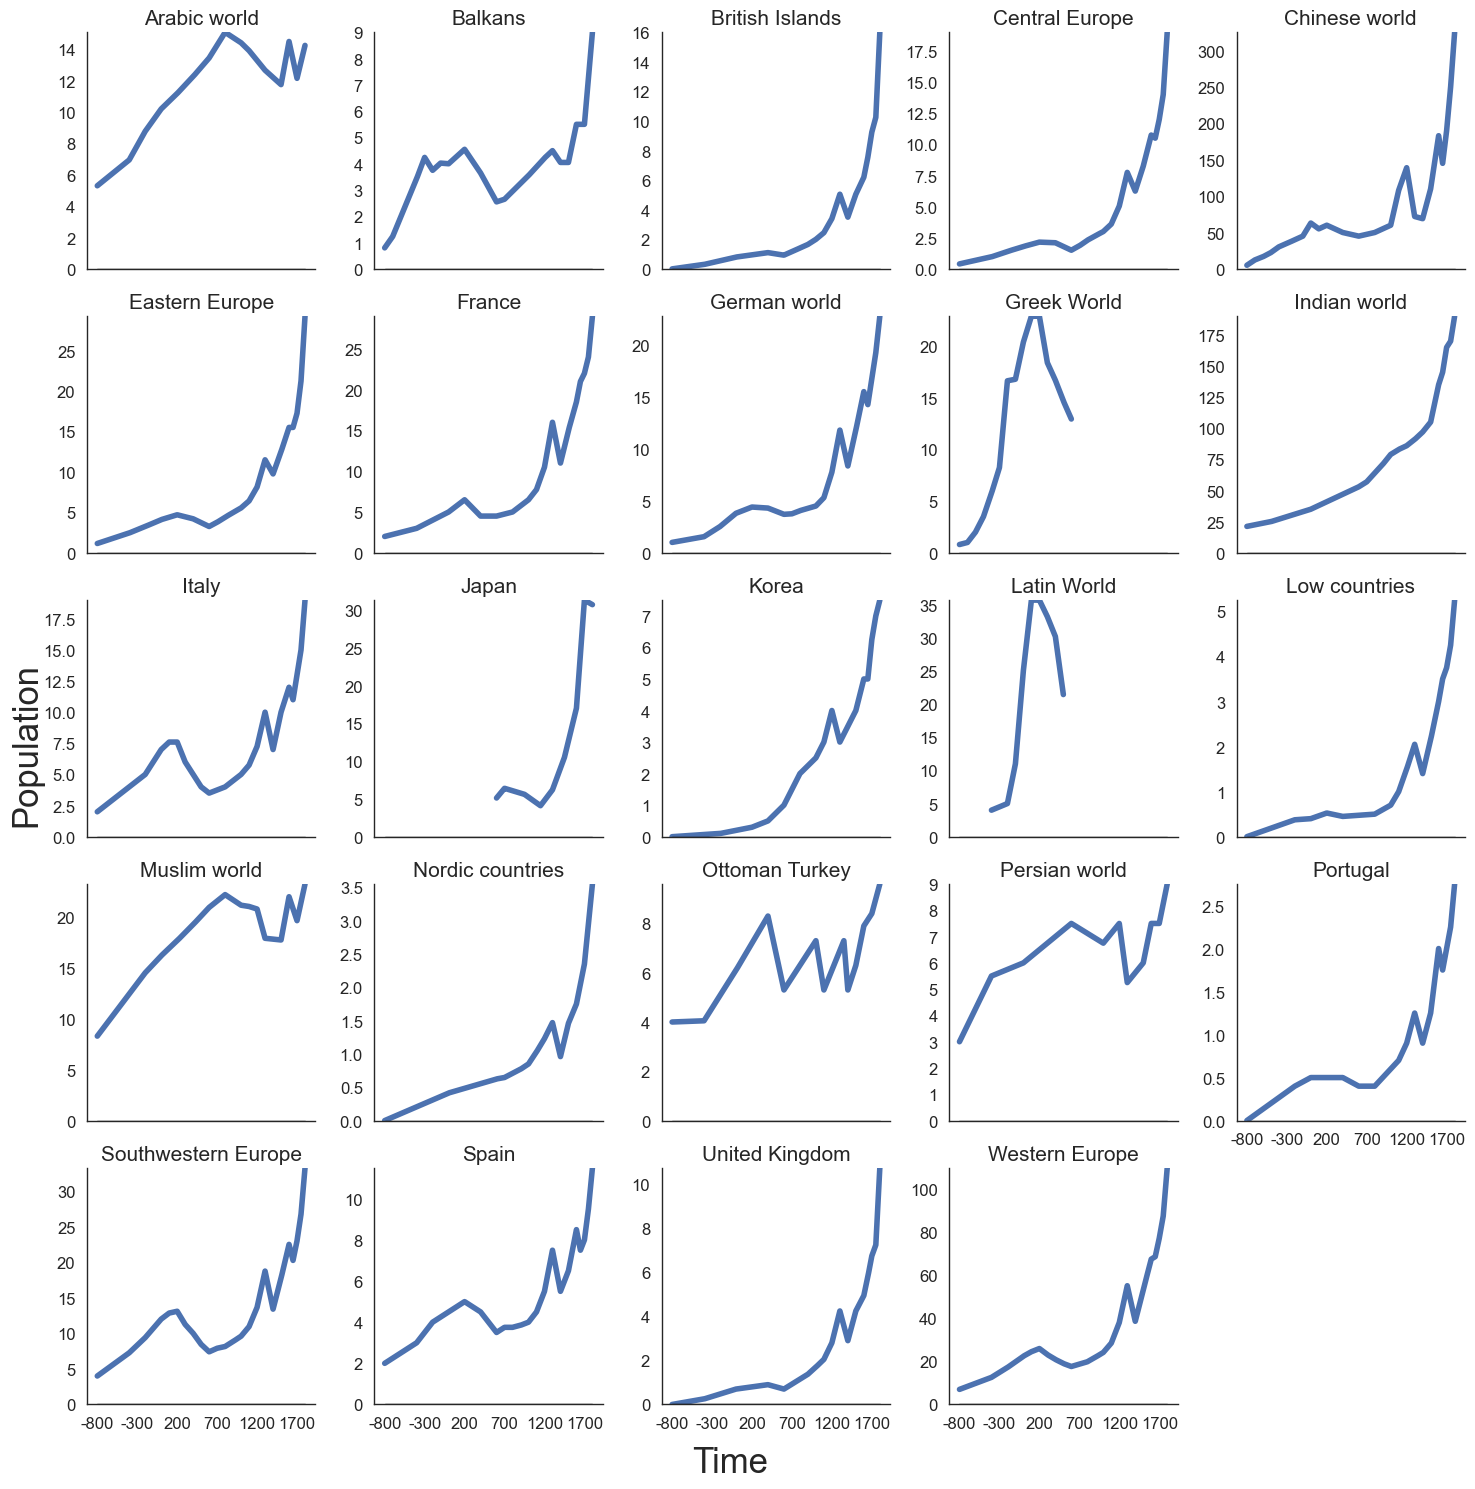

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# Filter out FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)




plt.figure(figsize=(10, 8))  # Adjust the size as needed

# Set the style and context for the plot
sns.set(style="white")
#sns.set(style="whitegrid")  # Add light grid lines

sns.set_context("paper", rc={"font.size": 10, "axes.titlesize": 10, "axes.labelsize": 8})

# Create a facet plot with one plot per region and five graphs in one line
g = sns.FacetGrid(df, col="region_name", col_wrap=5, height=3, sharex=True, sharey=False)
g = g.map(plt.plot, "year", "population", color='b', linewidth=4)

# Set common x-axis labels and titles
#g.set(xlabel="Year", title="Population Over Time")

#plt.figure(figsize=(15, 5))  # You can adjust the width (12) as needed

# Find the maximum population in each region
max_populations = df.groupby("region_name")["population"].max()

# Adjust the y-axis scale for each plot to match the highest population point
for i, ax in enumerate(g.axes):
    region_name = max_populations.index[i]
    max_population = max_populations[i]
    min_year = df["year"].min()
    max_year = df["year"].max()
    ax.set_ylim(0, max_population)  # Ensure the highest point touches the top
    x_ticks = range(min_year, max_year + 1, 500)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticks, fontsize=12)

    y_tick_labels = ax.get_yticklabels()
    ax.set_yticklabels(y_tick_labels, fontsize=12) 

    # Add timeline at the bottom of each graph
    ax.plot([df["year"].min(), df["year"].max()], [0, 0], color='k', linewidth=1)

# Remove grid lines
#g.despine(bottom=True, left=True)
g.set_titles("{col_name}", size=15)

g.set_axis_labels(y_var="", x_var="")
#g.set_ylabels("Log n CPs (unseen-species model) per capita")

#plt.ylabel('Your Unique Y-Label Here', labelpad=20)

g.fig.supylabel("Population", size = 25)
g.fig.supxlabel("Time", size = 25)

plt.tight_layout()

# Save the figure
plt.savefig("figures/environment/population_in_time_per_region.png", dpi=300)

# Show the plot
#plt.show()


In [4]:
df[df['region_name']=='Chinese world'].to_clipboard()

In [23]:
from tqdm import tqdm
# Group the data by region_code (you can do this for multiple regions)
regions = df.groupby("region_name")

# Create a super nice figure for each region
for region_name, region_data in tqdm(regions):
    plt.figure(figsize=(10, 8))  # Adjust figure size as needed
    plt.plot(region_data["year"], region_data["population"], label=region_data["region_name"].iloc[0], linewidth=3.0)
    plt.xlabel("")
    plt.xticks(fontsize=12)  # Adjust the fontsize as needed
    plt.yticks(fontsize=12)  # Adjust the fontsize as needed
    plt.ylabel("Population (Millions)", fontdict={'fontsize': 15})
    plt.title(f"Population for {region_data['region_name'].iloc[0]}", fontdict={'fontsize': 16})
    plt.grid(True)

    # Save the figure as a PNG file
    plt.savefig(f"figures/environment/population/{region_name}.png")

    # Close the figure to release memory
    plt.close()

  0%|          | 0/24 [00:00<?, ?it/s]

100%|██████████| 24/24 [00:02<00:00, 10.77it/s]
